In [382]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import quandl
import pandas as pd
import numpy as np
import functools
import statistics
import math

Arjun Kilaru

Homework 1

Quantitative Trading Strategies

In [338]:
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None, trim_end=None):
    qdata = quandl.get(list(my_data_items), returns="pandas", 
                      trim_start=trim_start, trim_end=trim_end,
                      api_key="v2EVM2mpJPBQrcyFbxcH")
    return qdata

def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

First we will use the aforementioned function to fetch all of the monthly data from Quandl. Then using a for loop we will build it piecewise to make sure we include the relavent dates with the proper time to expiry. We will repeat this twice to get two lists of futures prices which we will then use to create a dataframe where we can calculate and analyze the spread. 

In [339]:
raw_data = fetch_quandl(('OWF/CBT_FV_FV_H2021_IVM', 'OWF/CBT_FV_FV_M2021_IVM', 'OWF/CBT_FV_FV_U2021_IVM', 'OWF/CBT_FV_FV_Z2021_IVM', 'OWF/CBT_FV_FV_H2022_IVM', 'OWF/CBT_FV_FV_M2022_IVM',), trim_start = '2020-12-3', trim_end = '2022-08-31')
data = clean_quandl_columns(raw_data)
data = data.iloc[:,[0,15,16,31,32,47,48,63,64,79,80,95]]
data.columns = ['March21', 'DTE1', 'June21', 'DTE2', 'Sept21', 'DTE3', 'Dec21', 'DTE4', 'March22', 'DTE5', 'June22', 'DTE6']
data = data.fillna(0)
data.head(60)

#Create an empty list and fill that list with the appropriate security based upon the time to expiry
futures1 = []
for i in range(len(data)):
    dt1 = data.iloc[i,1]
    dt2 = data.iloc[i,3]
    dt3 = data.iloc[i,5]
    dt4 = data.iloc[i,7]
    dt5 = data.iloc[i,9]
    dt6 = data.iloc[i,11]
    if dt1 > 30:
        futures1.append(data.iloc[i,0])
        continue
    if dt2 > 30:
        futures1.append(data.iloc[i,2])
        continue
    if dt3 > 30:
        futures1.append(data.iloc[i,4])
        continue
    if dt4 > 30:
        futures1.append(data.iloc[i,6])
        continue
    if dt5 > 30:
        futures1.append(data.iloc[i,8])
        continue
    if dt6 > 30:
        futures1.append(data.iloc[i,10])
        continue



In [340]:
raw_data = fetch_quandl(('OWF/CBT_TU_TU_H2021_IVM', 'OWF/CBT_TU_TU_M2021_IVM', 'OWF/CBT_TU_TU_U2021_IVM', 'OWF/CBT_TU_TU_Z2021_IVM', 'OWF/CBT_TU_TU_H2022_IVM', 'OWF/CBT_TU_TU_M2022_IVM',), trim_start = '2020-12-3', trim_end = '2022-08-31')
data = clean_quandl_columns(raw_data)
#data = data.rename(columns={data.columns[0]: 'Future1'})
data = data.iloc[:,[0,15,16,31,32,47,48,63,64,79,80,95]]
data.columns = ['March21', 'DTE1', 'June21', 'DTE2', 'Sept21', 'DTE3', 'Dec21', 'DTE4', 'March22', 'DTE5', 'June22', 'DTE6']
data = data.fillna(0)
data.head(60)
     
futures2 = []
for i in range(len(data)):
    dt1 = data.iloc[i,1]
    dt2 = data.iloc[i,3]
    dt3 = data.iloc[i,5]
    dt4 = data.iloc[i,7]
    dt5 = data.iloc[i,9]
    dt6 = data.iloc[i,11]
    if dt1 > 30:
        futures2.append(data.iloc[i,0])
        continue
    if dt2 > 30:
        futures2.append(data.iloc[i,2])
        continue
    if dt3 > 30:
        futures2.append(data.iloc[i,4])
        continue
    if dt4 > 30:
        futures2.append(data.iloc[i,6])
        continue
    if dt5 > 30:
        futures2.append(data.iloc[i,8])
        continue
    if dt6 > 30:
        futures2.append(data.iloc[i,10])
        continue
len(futures2)

df3 = pd.DataFrame()
df3['FV'] = futures1
df3['TU'] = futures2
df3['TU'] = df3['TU'] * 1.1066
df3.index = data.index
df3['st'] = df3['TU'] - df3['FV']
df3

,FV,TU,st
Date,,,
2020-12-03,125.820312,122.161724,-3.658589
2020-12-04,125.734375,122.168640,-3.565735
2020-12-07,125.898438,122.192847,-3.705591
2020-12-08,125.906250,122.175556,-3.730694
2020-12-09,125.812500,122.168640,-3.643860
...,...,...,...
2022-05-13,112.960938,116.946871,3.985934
2022-05-16,113.281250,117.014305,3.733055
2022-05-17,112.671875,116.767049,4.095174


The spread has been created, and it can be plotted below. The values have been cross-referenced with the correct sample values provided in the pdf.

Text(0.5, 1.0, 'Spread FV/TU')

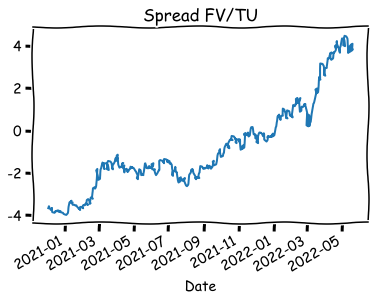

In [373]:
df3['st'].plot()
plt.title("Spread FV/TU")

Clearly, the spread appears to grow in a positive direction as time progresses. There are a few periods in which the spread dips but the overall trend is that of growth.

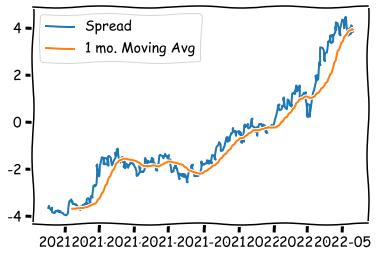

In [342]:
df3['rolling avg (30)'] = df3['st'].rolling(30).mean()
fig, ax = plt.subplots()
ax.plot(df3['st'])
ax.plot(df3['rolling avg (30)'])
ax.legend(['Spread', '1 mo. Moving Avg'])

0.28423761458333474

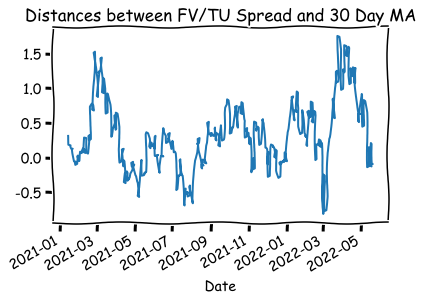

In [374]:
df3['dt'] = df3['st'] - df3['rolling avg (30)']
df3['dt'].plot()
plt.title("Distances between FV/TU Spread and 30 Day MA")
distances = df3['dt'].tolist()
distances = [x for x in distances if not math.isnan(x)]
statistics.stdev(distances)
statistics.mean(distances)
statistics.median(distances)

Excluding NA values (so the first month), the standard deviation of the differences for 1 month is 0.499. The median is 0.28 and the mean is 0.31. As such, it appears that on average, the difference between the spread and it's 30 day moving average is positive and skewed to the right. The spread grows shorter the next day in relation to it's average over the past month. 

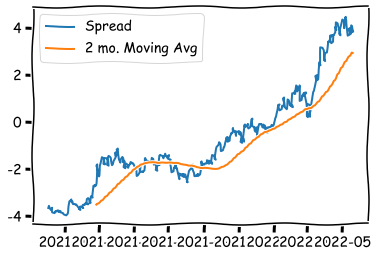

In [350]:
df3['rolling avg (60)'] = df3['st'].rolling(60).mean()
fig, ax = plt.subplots()
ax.plot(df3['st'])
ax.plot(df3['rolling avg (60)'])
ax.legend(['Spread', '2 mo. Moving Avg'])

0.1424392708333333

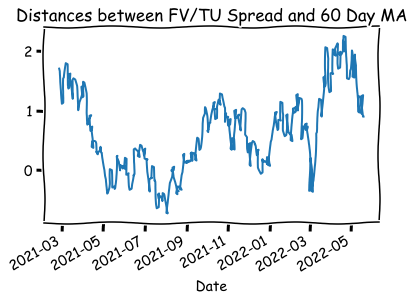

In [375]:
df3['dt2'] = df3['st'] - df3['rolling avg (60)']
df3['dt2'].plot()
plt.title("Distances between FV/TU Spread and 60 Day MA")
distances2 = df3['dt2'].tolist()
distances2 = [x for x in distances2 if not math.isnan(x)]
statistics.stdev(distances2)
statistics.mean(distances2)
statistics.median(distances2)
np.quantile(distances2,0.25)

When compared with  the 60 day moving average, the spread is on average 0.64 units higher. The median is 0.62 and the standard deviation is 0.67. So nearly all spread values are higher than their 60 day moving average counterparts. The 25th and 75th quantiles were both above zero, meaning a strong majority of the differences were positive. The central tendency of the data is certainly shifting upwards in this case.

We will now repeat the same dataframe construction and analysis with a different pair of futures. All of the methods and code is relatively identical.

In [348]:
raw_data = fetch_quandl(('OWF/CBT_US_US_H2021_IVM', 'OWF/CBT_US_US_M2021_IVM', 'OWF/CBT_US_US_U2021_IVM', 'OWF/CBT_US_US_Z2021_IVM', 'OWF/CBT_US_US_H2022_IVM', 'OWF/CBT_US_US_M2022_IVM',), trim_start = '2020-12-3', trim_end = '2022-08-31')
data = clean_quandl_columns(raw_data)
data = data.iloc[:,[0,15,16,31,32,47,48,63,64,79,80,95]]
data.columns = ['March21', 'DTE1', 'June21', 'DTE2', 'Sept21', 'DTE3', 'Dec21', 'DTE4', 'March22', 'DTE5', 'June22', 'DTE6']
data = data.fillna(0)
data
data.head(60)
     
futures3 = []
for i in range(len(data)):
    dt1 = data.iloc[i,1]
    dt2 = data.iloc[i,3]
    dt3 = data.iloc[i,5]
    dt4 = data.iloc[i,7]
    dt5 = data.iloc[i,9]
    dt6 = data.iloc[i,11]
    if dt1 > 30:
        futures3.append(data.iloc[i,0])
        continue
    if dt2 > 30:
        futures3.append(data.iloc[i,2])
        continue
    if dt3 > 30:
        futures3.append(data.iloc[i,4])
        continue
    if dt4 > 30:
        futures3.append(data.iloc[i,6])
        continue
    if dt5 > 30:
        futures3.append(data.iloc[i,8])
        continue
    if dt6 > 30:
        futures3.append(data.iloc[i,10])
        continue

df4 = pd.DataFrame()
df4['TU'] = futures2
df4['US'] = futures3
df4['US'] = df4['US'] * 0.6873
df4.index = data.index
df4['st'] = df4['US'] - df4['TU']
df4.head()

,TU,US,st
Date,,,
2020-12-03,110.393750,118.816988,8.423238
2020-12-04,110.400000,117.979341,7.579341
2020-12-07,110.421875,118.580728,8.158853
2020-12-08,110.406250,118.945856,8.539606
2020-12-09,110.400000,118.537772,8.137772


Text(0.5, 1.0, 'TU/US Spread')

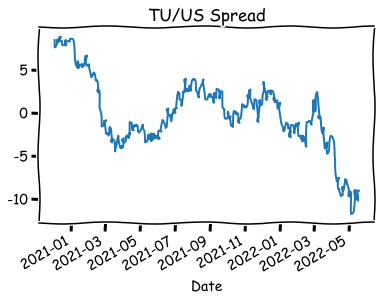

In [376]:
df4['st'].plot()
plt.title("TU/US Spread")

Here we see the spread start positive but eventually go to negative values between 2021 and 2022. There is a clear pattern of decline as time progresses. There is a period between 2021-03 and 2021-07 where the spread increases, but following that there is a gradual and then sharp decrease in the spread.

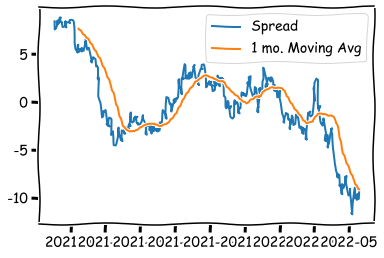

In [364]:
df4['rolling avg (30)'] = df4['st'].rolling(30).mean()
fig, ax = plt.subplots()
ax.plot(df4['st'])
ax.plot(df4['rolling avg (30)'])
ax.legend(['Spread', '1 mo. Moving Avg'])

-0.648718541666671

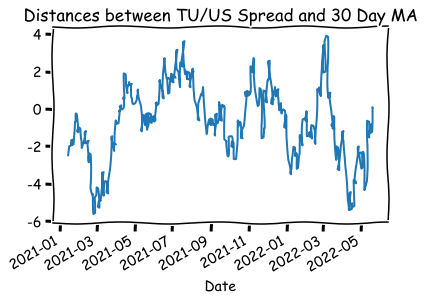

In [377]:
df4['dt'] = df4['st'] - df4['rolling avg (30)']
df4['dt'].plot()
plt.title("Distances between TU/US Spread and 30 Day MA")
distances = df4['dt'].tolist()
distances = [x for x in distances if not math.isnan(x)]
statistics.stdev(distances)
statistics.mean(distances)
statistics.median(distances)
np.quantile(distances,0.5)

We see that the median difference between the spread and it's 30 day moving average is -0.6. The mean is -0.69 and the stdev is 1.96. Clearly, there is a high left skew which indicates that as time goes on the difference grows increasingly negative. The 25% quantile is very negative, while the 75% quantile is positive. 

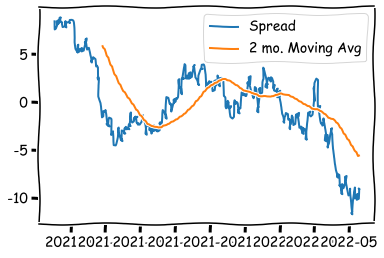

In [356]:
df4['rolling avg (60)'] = df4['st'].rolling(60).mean()
fig, ax = plt.subplots()
ax.plot(df4['st'])
ax.plot(df4['rolling avg (60)'])
ax.legend(['Spread', '2 mo. Moving Avg'])

We see that in the tail of the graph especially, the spread is much lower than the 2 month moving average. This is once again reflected in the summary statistics of the differences.

-0.7032755208333406

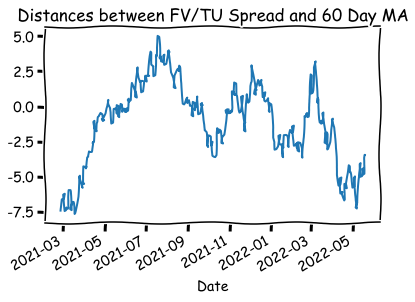

In [379]:
df4['dt2'] = df4['st'] - df4['rolling avg (60)']
df4['dt2'].plot()
plt.title("Distances between FV/TU Spread and 60 Day MA")
distances = df4['dt2'].tolist()
distances = [x for x in distances if not math.isnan(x)]
statistics.stdev(distances)
statistics.mean(distances)
statistics.median(distances)
#np.quantile(distances,0.5)

As expected, the median is even more negative: -0.703. The mean as well is -1.15, which indicates a further left skew and reality of the spread growing increasingly negative in comparison to the average of the last two months.

Next, we will analyze the two spreads in relation to one another. 

array([[ 1.        , -0.80322147],
       [-0.80322147,  1.        ]])

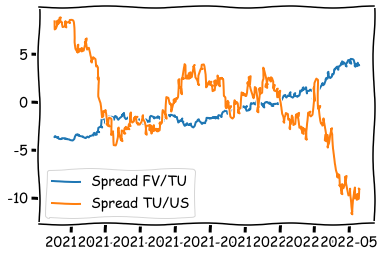

In [380]:
fig, ax = plt.subplots()
ax.plot(df3['st'])
ax.plot(df4['st'])
ax.legend(['Spread FV/TU', 'Spread TU/US'])
np.corrcoef(df3['st'], df4['st'])

The correlation between the two spreads are surprisingly high and negative: -0.8. That indicates a relatively strong negative linear relationship between the spreads between the two different pairs of security. This linear relationship can be further examined in terms of making market predictions or building signals.

Next, we will analyze the two differences (30 day moving average) in relation to one another.

array([[ 1.        , -0.81702146],
       [-0.81702146,  1.        ]])

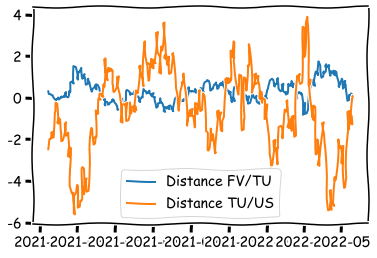

In [381]:
fig, ax = plt.subplots()
ax.plot(df3['dt'])
ax.plot(df4['dt'])
ax.legend(['Distance FV/TU', 'Distance TU/US'])
np.corrcoef(df3['dt'].dropna(), df4['dt'].dropna())

We see that when comparing FV and TU, the difference between the spread and the 30 day moving average stays between the range of -1.5 and 1.5. Conversely, when comparing TU and US, the difference is ranged between -6 and 4. The changes in the spread are therefore much more pronounced with the latter pair of securities, as the spread is typically 4 to -6 units away from the moving average. This could imply that the differences between the TU and US securities are much more volatile and subject to differ from their 30 day moving averages, making them a harder pair of securities to accurately predict and strategize around.